# Notebook 1 - Scipy Stats

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from sklearn.datasets import load_digits
import numpy as np


In [97]:
# Load the CSV file into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/Applied-statistics/refs/heads/main/dogs-ranking-dataset.csv')
df.head()

,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1


In [53]:
df.describe()

,score,popularity ranking,size,score for kids,INTELLIGENCE RANK,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,SUITABILITY FOR CHILDREN
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,2.603678,44.000000,1.954023,3.681839,41.540230,11.117701,1.689655,1.540230
std,0.570288,25.258662,0.819927,0.655736,21.979803,1.938465,1.707101,0.678655
min,0.990000,1.000000,1.000000,1.860000,1.000000,6.290000,0.000000,1.000000
25%,2.185000,22.500000,1.000000,3.180000,27.000000,10.000000,0.500000,1.000000
50%,2.710000,44.000000,2.000000,3.810000,43.000000,11.560000,1.000000,1.000000
75%,3.035000,65.500000,3.000000,4.115000,59.000000,12.430000,2.000000,2.000000
max,3.640000,87.000000,3.000000,4.990000,80.000000,16.500000,9.000000,3.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity ranking          87 non-null     int64  
 4   size                        87 non-null     int64  
 5   intelligence                87 non-null     object 
 6   congential ailments         87 non-null     object 
 7   score for kids              87 non-null     float64
 8   size.1                      87 non-null     object 
 9   $LIFETIME COST              87 non-null     object 
 10  INTELLIGENCE RANK           87 non-null     int64  
 11  INTELLIGENCE %              87 non-null     object 
 12  LONGEVITY(YEARS)            87 non-null     float64
 13  NUMBER OF GENETIC AILMENTS  87 non-nu

In [55]:
unique_values = df.nunique()
# Display the result
print(unique_values)

Breed                         87
type                           7
score                         71
popularity ranking            87
size                           3
intelligence                   6
congential ailments           47
score for kids                71
size.1                         3
$LIFETIME COST                87
INTELLIGENCE RANK             67
INTELLIGENCE %                67
LONGEVITY(YEARS)              83
NUMBER OF GENETIC AILMENTS     8
GENETIC AILMENTS              50
PURCHASE PRICE                77
FOOD COSTS PER YEAR           10
GROOMING FREQUNCY              3
SUITABILITY FOR CHILDREN       3
dtype: int64


In [56]:
size_proportions = df['size'].value_counts(normalize=True)

# Display the proportions
print(size_proportions)

size
1    0.356322
2    0.333333
3    0.310345
Name: proportion, dtype: float64


### We see that the amount of data we have for each size is almostt equal so we will use it to seperate the groups

In [57]:
small=df[df['size']==1]
mid =df[df['size']==2]
big =df[df['size']==3]

### Now let's plot this as a diagram

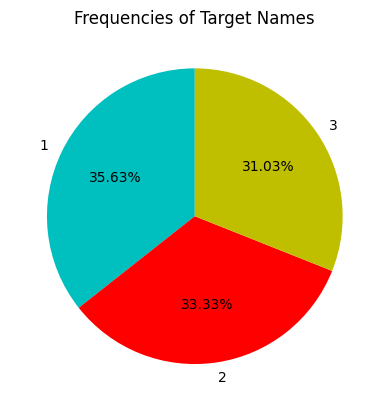

In [58]:
# Calculate the frequencies of target names
target_names_counts = df['size'].value_counts()

# Prepare data for the pie chart
labels = target_names_counts.index.to_list()
sections = target_names_counts.to_numpy()
colors = ['c', 'r', 'y']

# Create a pie chart
plt.pie(sections, labels=labels, colors=colors, startangle=90, autopct='%1.2f%%')

# Add title and show the pie chart
plt.title('Frequencies of Target Names')
plt.show()

In [59]:
# prompt: find missing values and duplicates, mark all rows

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print("the duplicate rows:")
print(duplicate_rows)
print("The missing values:")
print(missing_values)

the duplicate rows:
Empty DataFrame
Columns: [Breed, type, score, popularity ranking, size, intelligence, congential ailments, score for kids, size.1, $LIFETIME COST, INTELLIGENCE RANK, INTELLIGENCE %, LONGEVITY(YEARS), NUMBER OF GENETIC AILMENTS, GENETIC AILMENTS, PURCHASE PRICE, FOOD COSTS PER YEAR, GROOMING FREQUNCY, SUITABILITY FOR CHILDREN]
Index: []
The missing values:
Breed                         0
type                          0
score                         0
popularity ranking            0
size                          0
intelligence                  0
congential ailments           0
score for kids                0
size.1                        0
$LIFETIME COST                0
INTELLIGENCE RANK             0
INTELLIGENCE %                0
LONGEVITY(YEARS)              0
NUMBER OF GENETIC AILMENTS    0
GENETIC AILMENTS              0
PURCHASE PRICE                0
FOOD COSTS PER YEAR           0
GROOMING FREQUNCY             0
SUITABILITY FOR CHILDREN      0
dtype: int64


### We see there are no duplicates because the  "duplicate_rows" DataFrame is empty. we also see that there are no missing values Thanks to our beautiful data we don't need to drop anything

In [60]:
#boxplot

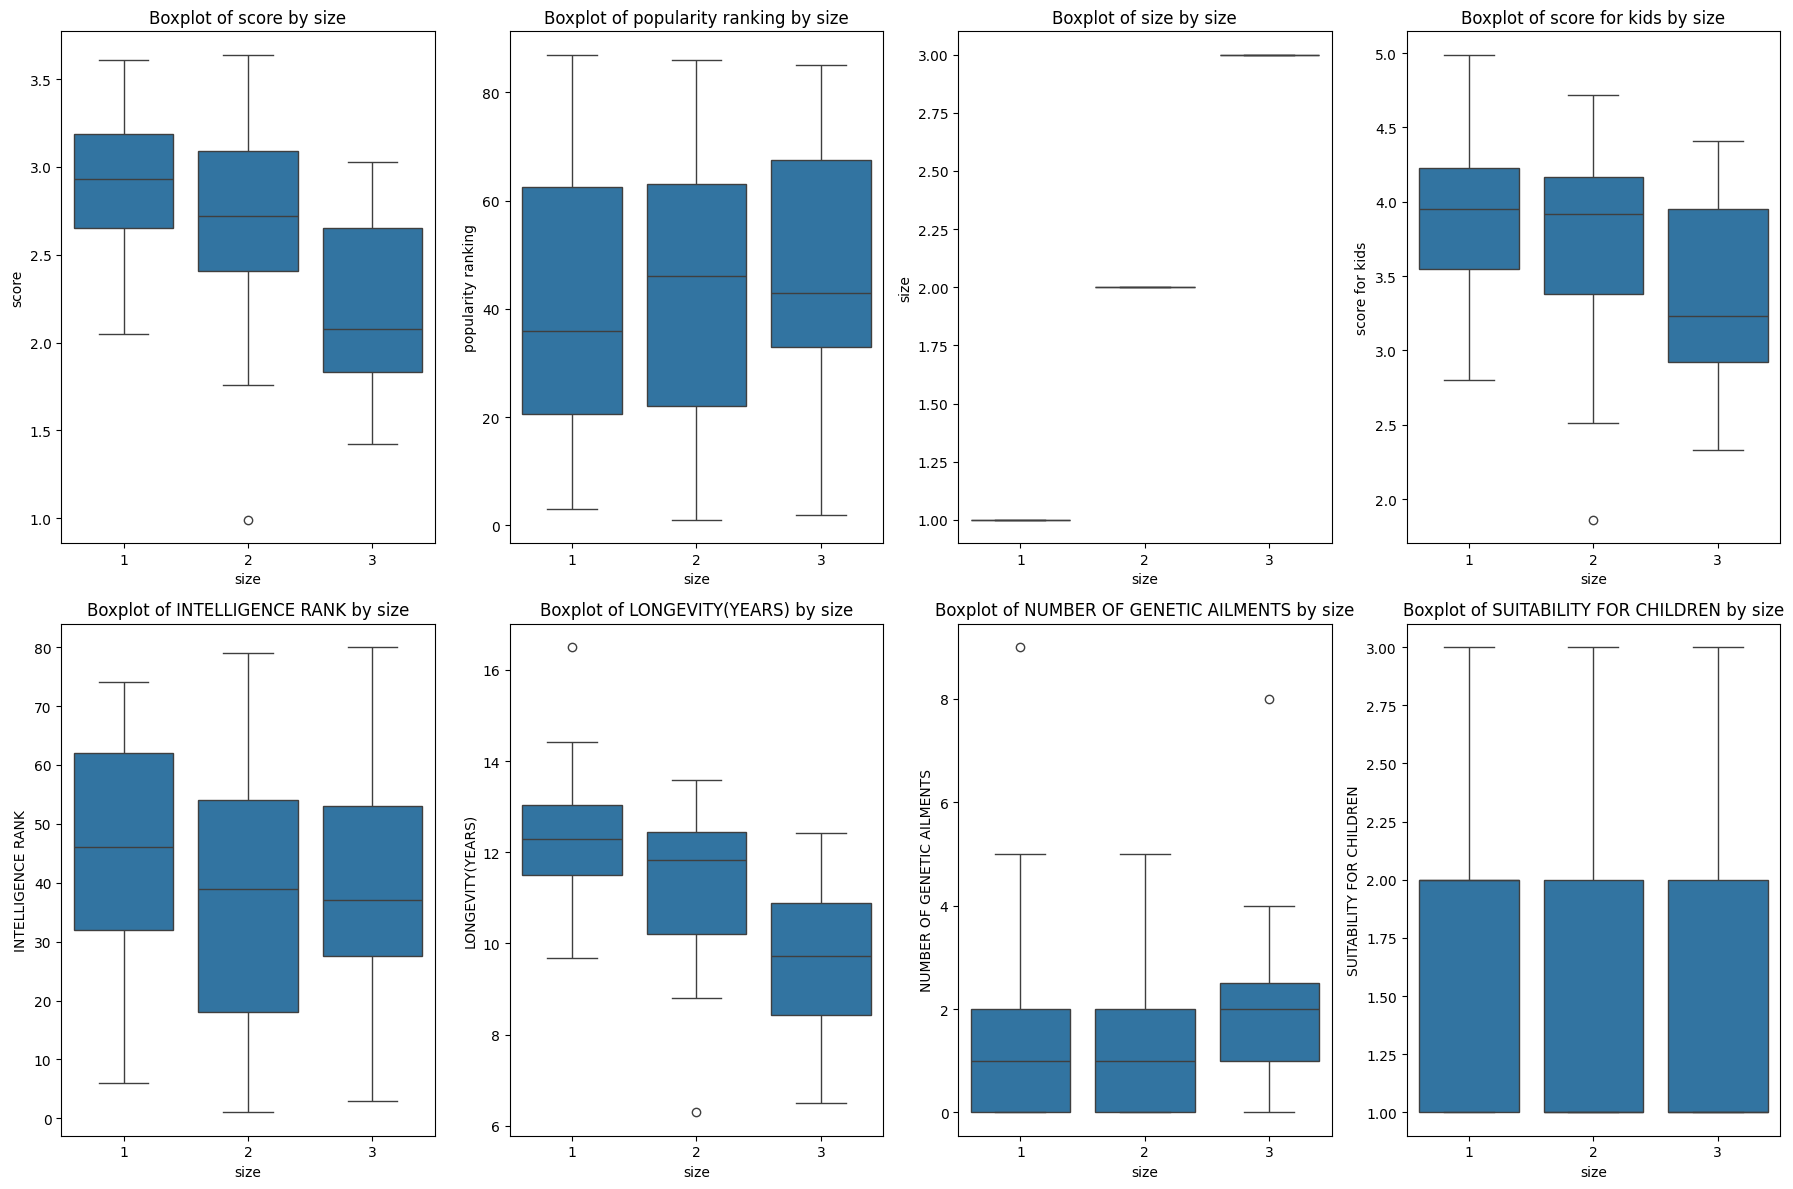

In [61]:

# Calculate the number of columns and rows
num_columns = len(df.select_dtypes(include=['int64', 'float64']).columns)
num_plots_per_row = 4
num_rows = math.ceil(num_columns / num_plots_per_row)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(18, 6 * num_rows))

# Iterate through each numerical column
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    sns.boxplot(x="size", y=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot of {column} by size")

# Remove empty subplots
for j in range(i + 1, num_rows * num_plots_per_row):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# We have to many plots in 1 row I want only 4 plots in a row

In [62]:
# an appgrade to the boxplot, violin plot

#  again, We will change it to be only 4 plots in a row

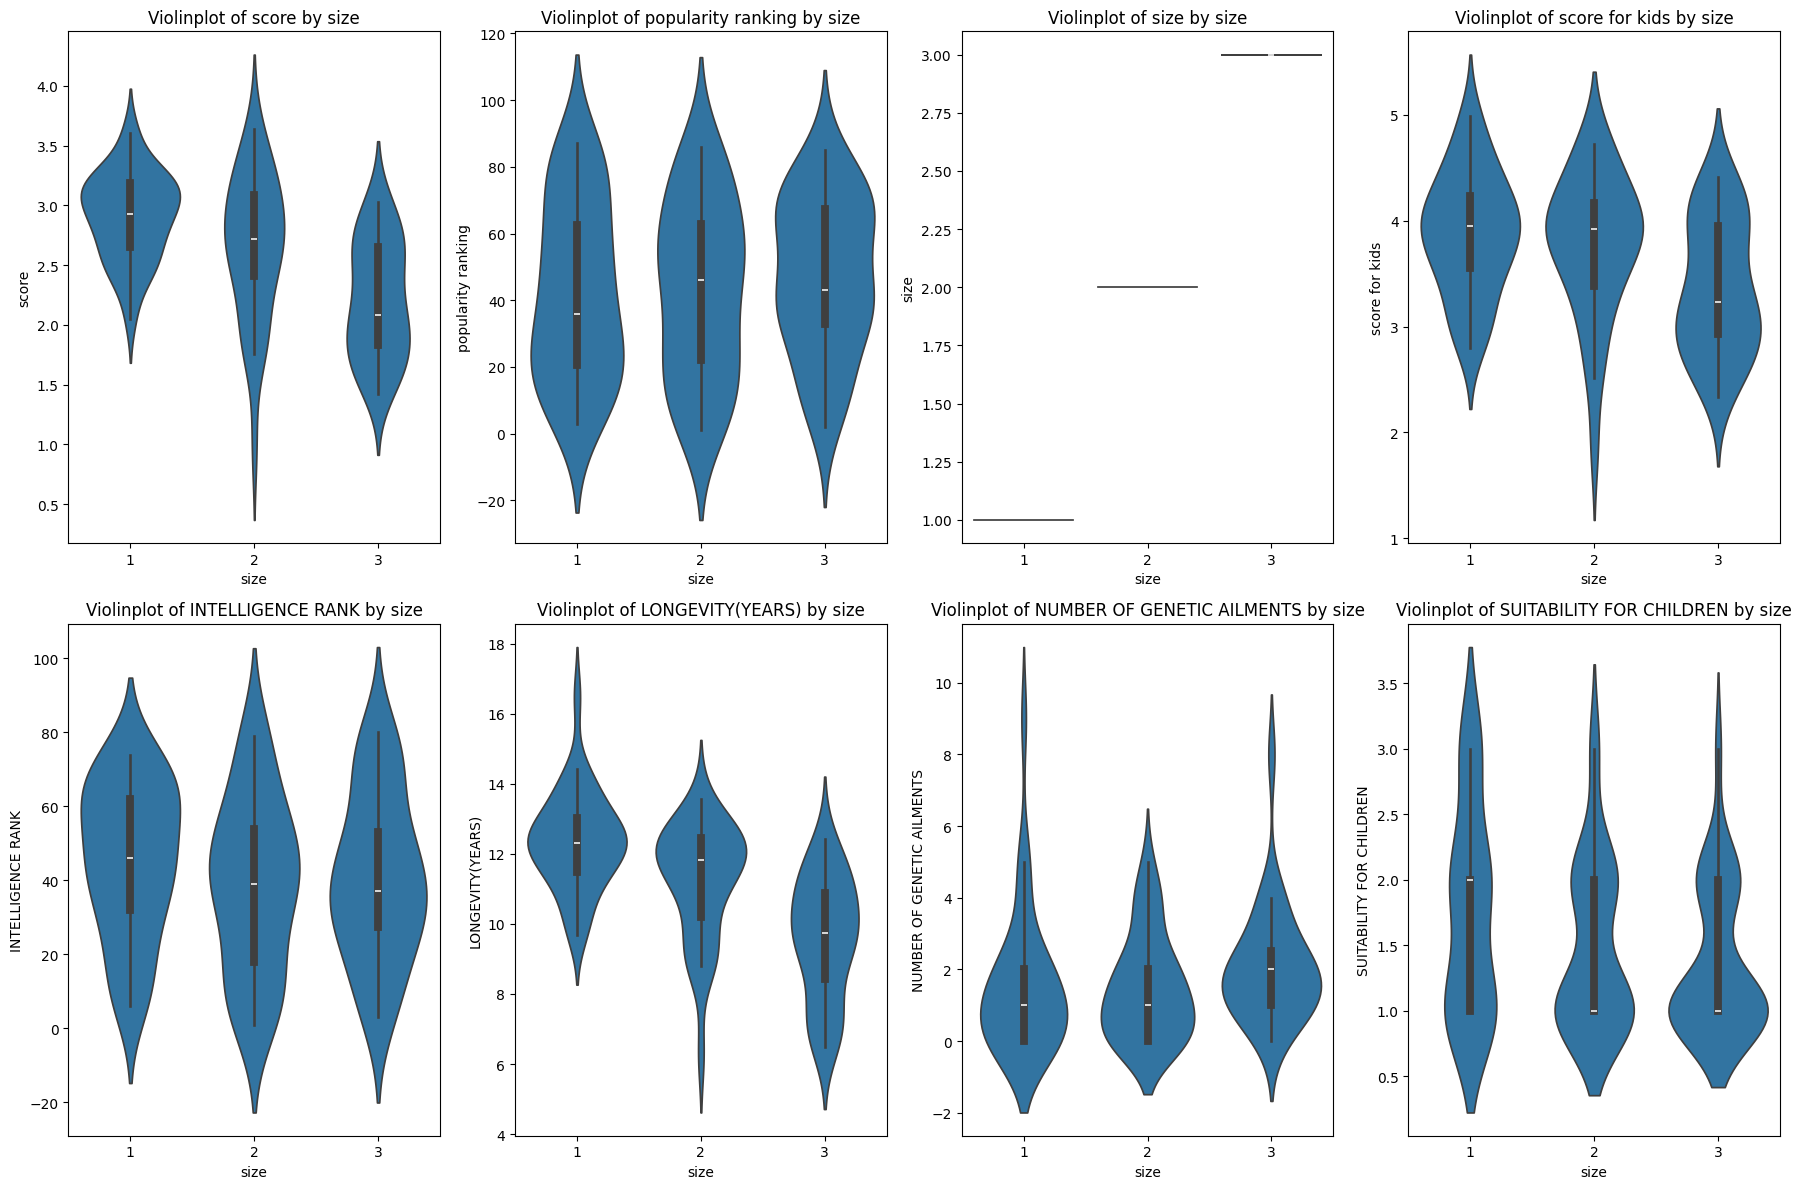

In [63]:

# Calculate the number of columns and rows
num_columns = len(df.select_dtypes(include=['int64', 'float64']).columns)
num_plots_per_row = 4  # Number of plots per row
num_rows = math.ceil(num_columns / num_plots_per_row)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(18, 6 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each numerical column
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    # Create a violin plot for each column
    sns.violinplot(x="size", y=column, data=df, ax=axes[i])
    axes[i].set_title(f"Violinplot of {column} by size")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

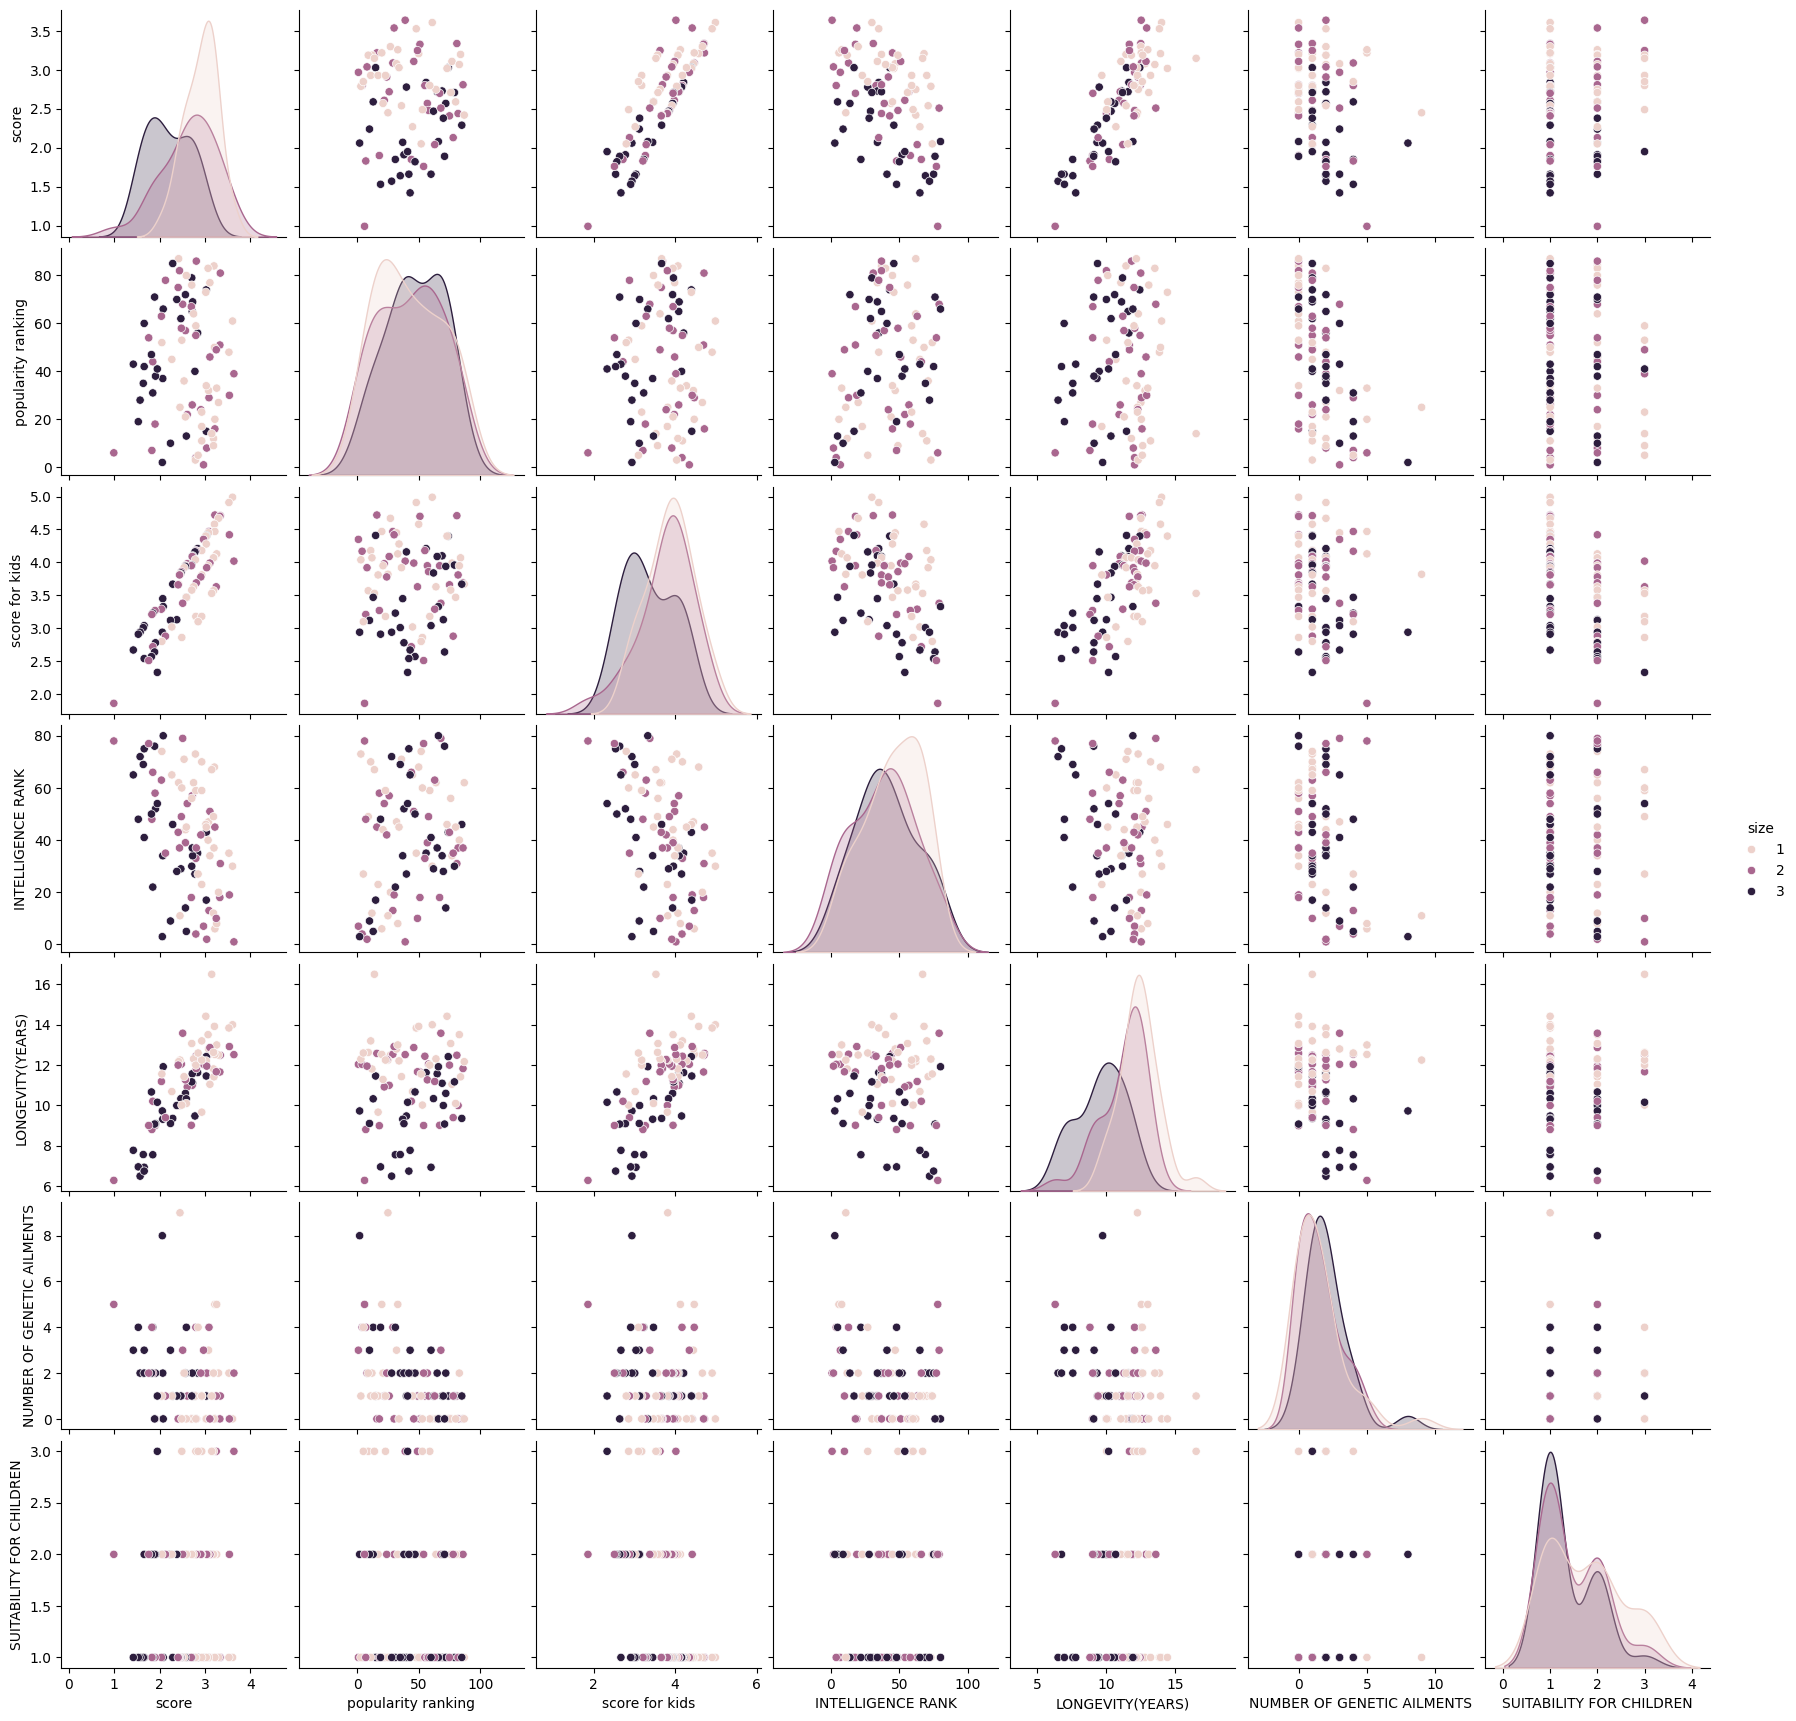

In [64]:
sns.pairplot(df, hue="size")
plt.show()

### Now we move on to statistical tests

> Add blockquote



### T-test
#### We need to check if the data from two sizes is normally distribution and if those we compare have the same variance

#### Let's check if the data's distribution is normal
##### We will compare the small ones to the mid ones since we saw from the violin plot that they are almoost normally distribution

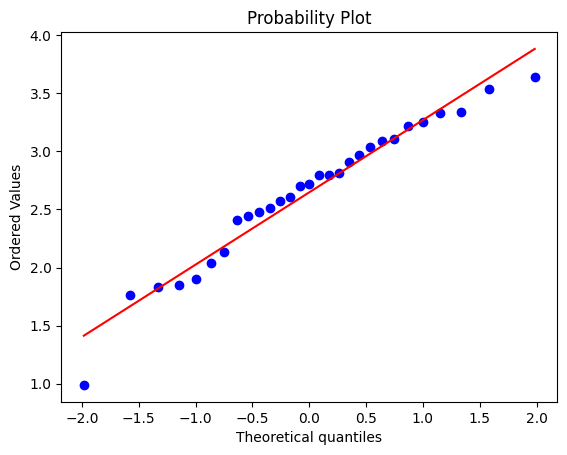

In [65]:
stats.probplot(mid['score'], dist="norm", plot=plt);

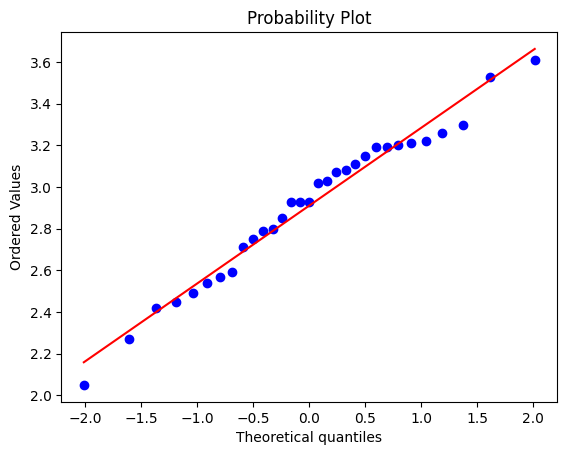

In [66]:
stats.probplot(small['score'], dist="norm", plot=plt);

### Both looks like they are close enough to normal disribution, but not exactly

### We will check if they have the same variance(even though we saw from the violin plot it is not exactly the same )

In [67]:
(small['score'].std(), mid['score'].std())

(0.36440229452908834, 0.6101544260638615)

### We see that the variances are not equal, we will check it also by 'Bartlett'

In [68]:
stats.bartlett(small['score'], mid['score'])

BartlettResult(statistic=7.33430917241507, pvalue=0.006765067443704602)

Aswe expected, the p-value (0.0067) is less than the typical significance level of 0.05, which indicates that the variances between the two groups (small and mid) are significantly different.
we will do the T-Test on another couple.

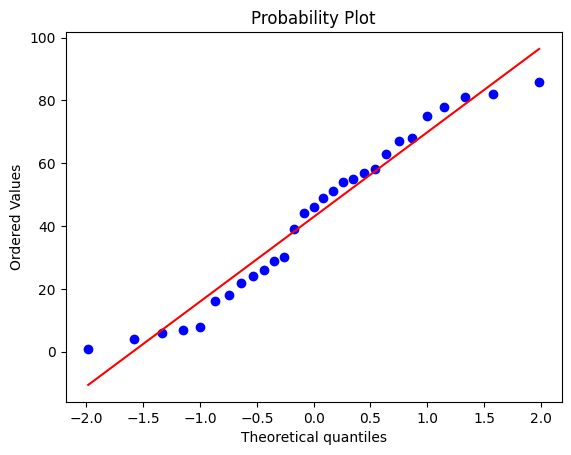

In [69]:
stats.probplot(mid['popularity ranking'], dist="norm", plot=plt);

In [70]:
stats.shapiro(mid['popularity ranking'])

ShapiroResult(statistic=0.9480201592004056, pvalue=0.1625692172687031)

The data is likely normally distributed because the p-value is above 0.05.

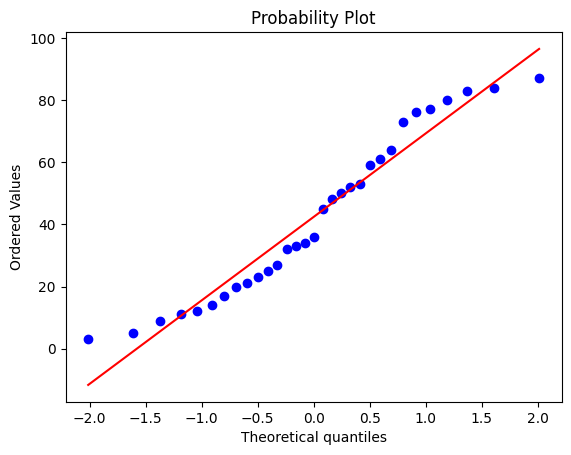

In [71]:
stats.probplot(small['popularity ranking'], dist="norm", plot=plt);

In [72]:
stats.shapiro(small['popularity ranking'])

ShapiroResult(statistic=0.9359078497362077, pvalue=0.06362543660564902)

The data is likely normally distributed because the p-value is above 0.05.

In [73]:
(small['popularity ranking'].std(), mid['popularity ranking'].std())

(26.486068563623956, 26.36331979364268)

In [74]:
###The variancees look very close

In [75]:
stats.bartlett(small['popularity ranking'], mid['popularity ranking'])

BartlettResult(statistic=0.000614346758086763, pvalue=0.9802256425301712)

 there is no significant difference in the variances of the "popularity ranking" between the small and mid groups.

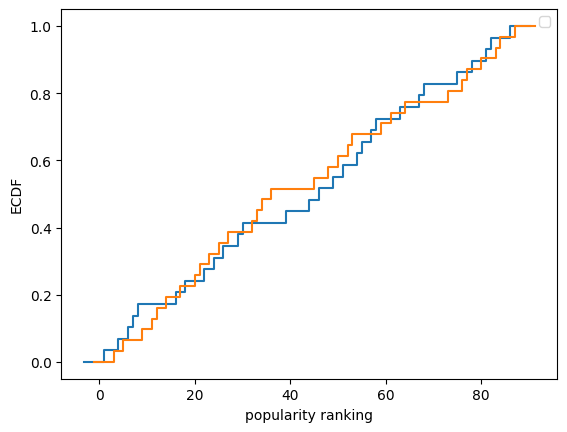

In [76]:
versicolor_ecdf = stats.ecdf( mid['popularity ranking'])
versicolor_ecdf.cdf.plot(plt)


virginica_ecdf = stats.ecdf( small['popularity ranking'])
virginica_ecdf.cdf.plot(plt)
plt.xlabel(r'popularity ranking')
plt.ylabel('ECDF')
plt.legend()

The distributions appear to be very close, we will show that they  are likely the same with KS test.

In [77]:
stats.ks_2samp( mid['popularity ranking'],  small['popularity ranking'])

KstestResult(statistic=0.10789766407119021, pvalue=0.982854619886822, statistic_location=8, statistic_sign=1)

A smaller value of 'statistic' indicates that the two distributions are more similar.
The p-value is 0.9514, which is quite high. This suggests that there is no statistically significant difference between the two distributions,
as we expected.

###-Since the p-value is much greater than the common significance level of 0.05,
we fail to reject the null hypothesis, which means there is strong evidence that the variances across the groups are equal.
We see that the distributions are normal and the variances are almost the same so we will use T-test
(we won't be sure that the T_test's result are 100% true because this is not exactly normal and the variance is not exactly the same)
-To do a T-test we need 2 arrays in the same size

In [78]:
num_rows, num_columns = small.shape

# Print the number of rows
print(f"Number of rows in small: {num_rows}")
num_rows, num_columns = mid.shape

# Print the number of rows
print(f"Number of rows in mid: {num_rows}")

Number of rows in small: 31
Number of rows in mid: 29


### We will delete 2 random rows from 'small'

In [79]:
print("Number of rows before deletion:", len(small))

# Step 1: Select 2 random rows
random_rows = small.sample(n=2, random_state=1)  # random_state is optional for reproducibility

# Step 2: Drop the selected rows
small = small.drop(random_rows.index)

# Check the result
print("Number of rows after deletion:", len(small))

Number of rows before deletion: 31
Number of rows after deletion: 29


### Now they both have the same amount of rows we can do T-test

In [80]:
stats.ttest_rel(small['popularity ranking'], mid['popularity ranking'])

TtestResult(statistic=0.07761379093005004, pvalue=0.9386872533496926, df=28)

### A p-value close to 1 (like 0.9387) indicates that there is a very high probability of observing the data under the null hypothesis. Suggesting no significant difference between the groups. Which shows us the ''popularity ranking' is similar between the small tipe and the midium tipe.

### We will choose the group where all distributions look normal and variances look very similar. I won't find a group with three identical variances so I won't fully trust the ANOVA result in this case. I chose 'INTELLIGENCE RANK' in small, mid and large.

In [81]:
stats.shapiro(small['INTELLIGENCE RANK'])

ShapiroResult(statistic=0.9387460257352218, pvalue=0.09296741158077294)

In [82]:
stats.shapiro(mid['INTELLIGENCE RANK'])

ShapiroResult(statistic=0.9593551426485548, pvalue=0.3168945820795218)

In [83]:
stats.shapiro(big['INTELLIGENCE RANK'])

ShapiroResult(statistic=0.9639239715595331, pvalue=0.45191943162998277)

In [84]:
stats.bartlett(small['INTELLIGENCE RANK'], mid['INTELLIGENCE RANK'], big['INTELLIGENCE RANK'])

BartlettResult(statistic=0.396642487114167, pvalue=0.8201063569335799)

Since the p-value is 0.8201, which is much higher than the common significance level of 0.05, we fail to reject the null hypothesis. This means there is no statistically significant evidence to suggest that the variances are different across the groups, and we can use ANOVA.

In [85]:
stats.f_oneway(small['INTELLIGENCE RANK'], mid['INTELLIGENCE RANK'], big['INTELLIGENCE RANK'])

F_onewayResult(statistic=0.7088201423032454, pvalue=0.4952152752430644)

The one-way ANOVA test suggests that the means of the groups being compared are not significantly different, as indicated by the high p-value.
Which shows us the 'INTELLIGENCE RANK' is similar between all the sizes.

#kruskal:
#-An alternative to the one-way ANOVA when the assumptions of ANOVA (such as normality) are not met.
#-We will use krushkal to check if there is a significant effect of the size on the 'popularity ranking' which doesnt look normal.

In [86]:
stats.shapiro(small['SUITABILITY FOR CHILDREN'])

ShapiroResult(statistic=0.7812499920189179, pvalue=3.9213842253685137e-05)

In [87]:
stats.shapiro(mid['SUITABILITY FOR CHILDREN'])

ShapiroResult(statistic=0.7097596144934395, pvalue=2.9126677166538716e-06)

In [88]:
stats.shapiro(big['SUITABILITY FOR CHILDREN'])

ShapiroResult(statistic=0.6510222334608605, pvalue=8.656397779828345e-07)

For all three datasets (small, mid, big), the Shapiro-Wilk test results indicate that the 'SUITABILITY FOR CHILDREN' variable does not follow a normal distribution.

In [89]:
stats.kruskal(small['SUITABILITY FOR CHILDREN'], mid['SUITABILITY FOR CHILDREN'], big['SUITABILITY FOR CHILDREN'])

KruskalResult(statistic=3.661576489162649, pvalue=0.16028717247135416)



```
# This is formatted as code
```

The kruskal test suggests that there are no significant differences between the means of the groups being compared.
Which suprisingly tells us the size of the dog doesn't make a significant difference in the suitability for childrens.

In [99]:
# Create a contingency table
ctab = pd.crosstab( df['SUITABILITY FOR CHILDREN'],df['size'])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ctab)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n{expected}")

Chi-square statistic: 5.308587044590011
P-value: 0.25707414377118204
Degrees of freedom: 4
Expected frequencies: 
[[17.45977011 16.33333333 15.20689655]
 [10.33333333  9.66666667  9.        ]
 [ 3.20689655  3.          2.79310345]]


Since the p-value is not significant, there isn't enough evidence to conclude that size and SUITABILITY FOR CHILDREN are related. They appear to be independent in this dataset.

### The experiment Lady tasting tea is already done, I'll check what came first, the egg or the chicken.

In [90]:
n_trails = 1000
egg_first = np.random.permutation([False]*n_trails + [True]* n_trails)
lady_said        = np.random.permutation([False]*n_trails + [True]* n_trails)
df = pd.DataFrame({'egg_first': egg_first, 'lady_said': lady_said})
df

,egg_first,lady_said
0,False,False
1,False,True
2,True,False
3,True,False
4,True,True
...,...,...
1995,False,True
1996,False,True
1997,False,False
1998,False,True


In [91]:
ctab = pd.crosstab(df['egg_first'], df['lady_said'])
ctab

lady_said,False,True
egg_first,,
False,512,488
True,488,512


In [92]:
n_trials = 1000
guesses = int(0.05*n_trials)
egg_first = np.random.permutation([False]*n_trials + [True]* n_trials)
lady_said        = np.random.permutation([False]*guesses + [True]*guesses)
lady_said        = np.concatenate([lady_said, egg_first[2*guesses:]])
df = pd.DataFrame({'egg_added_first': egg_first, 'lady_said': lady_said})
df

,egg_added_first,lady_said
0,True,True
1,False,True
2,False,True
3,True,False
4,False,True
...,...,...
1995,False,False
1996,False,False
1997,False,False
1998,False,False


In [93]:
ctab = pd.crosstab(df['egg_added_first'], df['lady_said'])
ctab

lady_said,False,True
egg_added_first,,
False,972,28
True,24,976


In [100]:
statistic = lambda x : x.mean()
res = stats.bootstrap([small['score']], statistic, confidence_level=0.9)
res.confidence_interval

ConfidenceInterval(low=2.7862068965517244, high=3.0120689655172415)

we have successfully calculated a 90% confidence interval for the mean of the small['score'] column, which ranges between 2.786 and 3.012.